# The Interactive Brokers (IBKR) API

## Getting Started

__Installation of IB API Wrapper Package with the following Command:__

pip install ib_insync

__Documentation__

https://ib-insync.readthedocs.io/readme.html

__Required changes in TWS API-Settings__ (marked yellow)

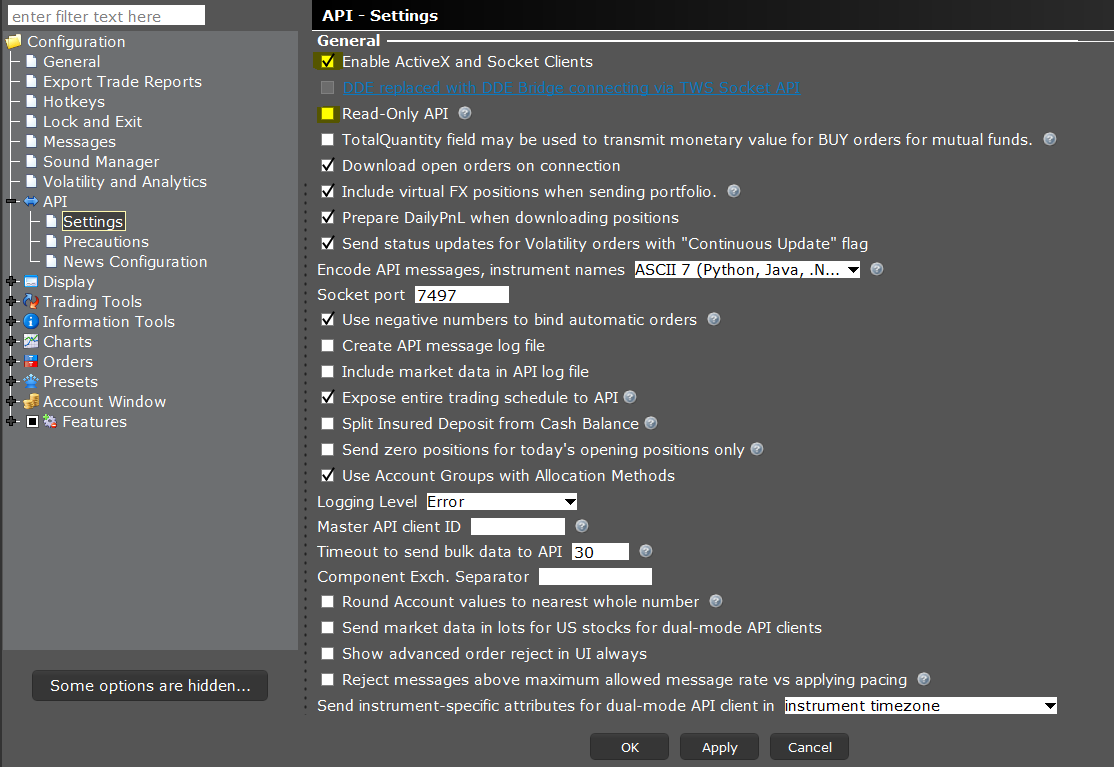

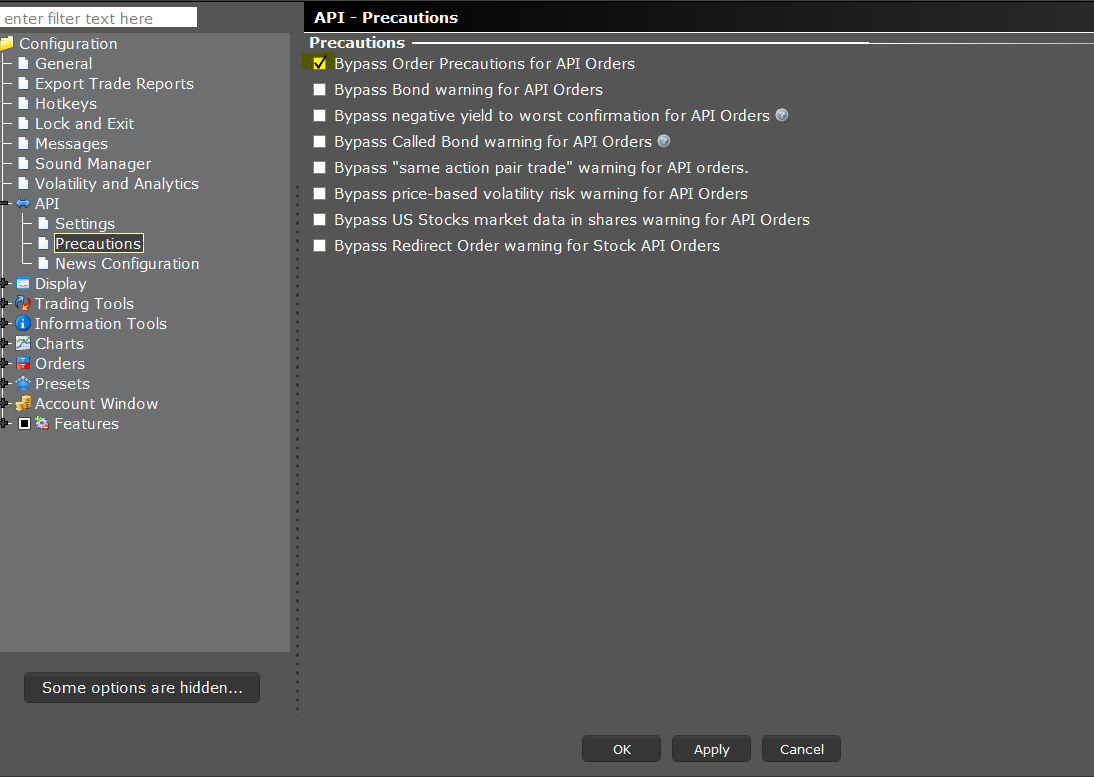

## Connection

In [ ]:
from ib_insync import *
util.startLoop() # required in Jupyter (interactive environments), not in scripts 

In [ ]:
ib = IB()

__Make sure you are logged in your TWS!!!__

In [ ]:
ib.connect()

In [ ]:
ib.positions()

In [ ]:
ib.disconnect()

## Contracts (Introduction)

In [ ]:
from ib_insync import *
util.startLoop()

In [ ]:
ib = IB()

In [ ]:
ib.connect()

In [ ]:
contract = Forex("EURUSD")
contract

In [ ]:
contract = ib.qualifyContracts(contract)
contract

In [ ]:
type(contract)

In [ ]:
contract[0]

In [ ]:
contract[0].conId

__Contracts by Asset Class__

In [ ]:
# Contract(conId=270639)
# Stock('AMD', 'SMART', 'USD')
# Stock('INTC', 'SMART', 'USD', primaryExchange='NASDAQ')
# Forex('EURUSD')
# CFD('IBUS30')
# Future('ES', '20180921', 'GLOBEX')
# Option('SPY', '20170721', 240, 'C', 'SMART')
# Bond(secIdType='ISIN', secId='US03076KAA60');

In [ ]:
contract = Stock("AAPL", "SMART", "USD")
contract

In [ ]:
contract = ib.qualifyContracts(contract) # unambiguous
contract

In [ ]:
contract = ib.qualifyContracts(Stock("AAPL")) # ambiguous
contract

In [ ]:
ib.disconnect()

## Current Market Data

In [ ]:
import pandas as pd
from ib_insync import *
util.startLoop()

In [ ]:
ib = IB()

In [ ]:
ib.connect()

In [ ]:
contract = Forex("EURUSD")
contract

In [ ]:
data1 = ib.reqMktData(contract)
data1

In [ ]:
data1

In [ ]:
data1.ask

In [ ]:
data1.askSize

In [ ]:
data1.marketPrice()

In [ ]:
data1.time

In [ ]:
pd.to_datetime(data1.time)

In [ ]:
contract = Stock("AAPL", "SMART", "USD")
contract

In [ ]:
data2 = ib.reqMktData(contract)

In [ ]:
data2

In [ ]:
data2.ask

In [ ]:
ib.reqMarketDataType(3)

marketDataType: One of:

        * 1 = Live
        * 2 = Frozen
        * 3 = Delayed
        * 4 = Delayed frozen

https://interactivebrokers.github.io/tws-api/market_data_type.html

In [ ]:
contract = Stock("LHA", "SMART", "EUR")
contract

In [ ]:
data3 = ib.reqMktData(contract)

In [ ]:
data3

In [ ]:
data3.marketPrice()

In [ ]:
ib.disconnect()

## Data Streaming for Mulitple Tickers 

In [ ]:
for i in range(10):
    print(round(data1.marketPrice(), 5), round(data2.marketPrice(), 3), round(data3.marketPrice(), 3))
    ib.sleep(1)

## Contracts (advanced)

In [ ]:
from ib_insync import *
util.startLoop()

In [ ]:
ib = IB()

In [ ]:
ib.connect()

__Case 1: unambiguous (one contract exist)__

In [ ]:
contract = Stock("AAPL", "SMART", "USD")
contract

In [ ]:
cds = ib.reqContractDetails(contract)
cds

In [ ]:
len(cds)

In [ ]:
cds[0].contract

In [ ]:
cds[0].contract.conId

In [ ]:
cds[0].orderTypes

__Case 2: unknown__

In [ ]:
contract = Stock("GSDFOLS", "SMART", "USD")
contract

In [ ]:
cds = ib.reqContractDetails(contract)
cds

In [ ]:
len(cds) 

__Case 3: ambiguous (multiple contracts)__

In [ ]:
contract = Stock("AAPL")
contract

In [ ]:
cds = ib.reqContractDetails(contract)
cds

In [ ]:
len(cds)

In [ ]:
contracts = [cd.contract for cd in cds]
contracts

In [ ]:
contracts[0]

In [ ]:
util.df(contracts) # converting to pd Dataframe shortcut (alternative: pd.DataFrame())

In [ ]:
contract = Stock("LHA", "SMART", "EUR")
contract

In [ ]:
cds = ib.reqContractDetails(contract)
cds

In [ ]:
len(cds)

In [ ]:
ib.disconnect()

## Forex and CFD Contracts

In [ ]:
from ib_insync import *
util.startLoop()

In [ ]:
ib = IB()

In [ ]:
ib.connect()

__FOREX__

In [ ]:
contract = Forex("EURUSD")
contract

In [ ]:
ib.qualifyContracts(contract) 

In [ ]:
data = ib.reqMktData(contract)
data

In [ ]:
data.ask

__CFD__

In [ ]:
contract = CFD("EUR", currency = "USD")
contract

In [ ]:
ib.qualifyContracts(contract) 

In [ ]:
data = ib.reqMktData(contract)
data

In [ ]:
data.ask

In [ ]:
ib.disconnect()

## Creating Orders (Stock Trading)

__Please run the following code only with your Paper Trading Account!!!__

__Check the Regular Trading Hours!!!__

In [ ]:
import pandas as pd
from ib_insync import *
util.startLoop()

In [ ]:
ib = IB()

In [ ]:
ib.connect()

In [ ]:
contract = Stock("LHA", "SMART", "EUR")
contract

In [ ]:
ib.qualifyContracts(contract)

__Market Buy Order__

In [ ]:
order = MarketOrder(action = "BUY", totalQuantity = 1)
order

In [ ]:
trade = ib.placeOrder(contract, order)
trade

__Time Lag until Order is filled__

In [ ]:
ib.sleep(5)
trade.log

In [ ]:
trade

In [ ]:
trade.orderStatus.status

In [ ]:
trade.orderStatus.avgFillPrice

In [ ]:
ib.trades()

In [ ]:
ib.orders()

__Market Sell Order__

In [ ]:
order = MarketOrder(action = "SELL", totalQuantity = 1)
order

In [ ]:
trade = ib.placeOrder(contract, order)
ib.sleep(1)
trade

In [ ]:
ib.trades()

__wait until the order is either filled or canceled__

In [ ]:
%%time
order = MarketOrder("BUY", 1)

trade = ib.placeOrder(contract, order)
while not trade.isDone():
    ib.waitOnUpdate()

In [ ]:
trade

In [ ]:
ib.fills()

In [ ]:
df = util.df([fs.execution for fs in ib.fills()])
df

In [ ]:
ib.disconnect()

## Creating Orders (CFD Trading)

__Please run the following code only with your Paper Trading Account!!!__

__Check the Regular Trading Hours!!!__

In [ ]:
import pandas as pd
from ib_insync import *
util.startLoop()

In [ ]:
ib = IB()

In [ ]:
ib.connect()

In [ ]:
contract = CFD("EUR", currency = "USD")
contract

In [ ]:
ib.qualifyContracts(contract) 

__Going Long__

In [ ]:
order = MarketOrder(action = "BUY", totalQuantity = 10000)
order

In [ ]:
trade = ib.placeOrder(contract, order)
trade

__Close Position__

In [ ]:
order = MarketOrder(action = "SELL", totalQuantity = 10000)
order

In [ ]:
trade = ib.placeOrder(contract, order)
trade

## CFD Trade Information

In [ ]:
ib.fills()

In [ ]:
util.df([fs.execution for fs in ib.fills()]) # execution data

In [ ]:
fill_df = util.df([fs.execution for fs in ib.fills()])[["execId", "time", "side", "cumQty",
                                                        "avgPrice"]].set_index("execId")
fill_df

In [ ]:
fill_df["TradeValue"] = fill_df.side.apply(lambda x: 1 if x == "SLD" else -1) * fill_df.cumQty * fill_df.avgPrice
fill_df

In [ ]:
fill_df.TradeValue.sum()

In [ ]:
util.df([fs.commissionReport for fs in ib.fills()]) # commission and PNL data

In [ ]:
profit_df = util.df([fs.commissionReport for fs in ib.fills()])[["execId", "currency", "commission",
                                                                 "realizedPNL"]].set_index("execId")
profit_df

In [ ]:
profit_df.realizedPNL.sum()

Total Commissions (in USD) + Sum of Trade Values == Total PNL

In [ ]:
- profit_df.commission.sum() * fill_df.avgPrice.mean() + fill_df.TradeValue.sum()

In [ ]:
ib.disconnect()

## Positions and Account Values

In [ ]:
import pandas as pd
from ib_insync import *
util.startLoop()

In [ ]:
ib = IB()

In [ ]:
ib.connect()

In [ ]:
pos = ib.positions()
pos

In [ ]:
df = util.df(pos)
df

In [ ]:
df["symbol"] = df.contract.apply(lambda x: x.symbol)
df["conID"] = df.contract.apply(lambda x: x.conId)

In [ ]:
df

In [ ]:
av = ib.accountValues()
av

In [ ]:
df2 = util.df(av)
df2

In [ ]:
df2.loc[df2.tag == "CashBalance"]

In [ ]:
ib.disconnect()

## Historical Data (Bars)

In [ ]:
from ib_insync import *
util.startLoop()

In [ ]:
ib = IB()
ib.connect()

In [ ]:
contract = Forex("EURUSD")
contract

In [ ]:
start = ib.reqHeadTimeStamp(contract, whatToShow = "MIDPOINT", useRTH = True)
start

In [ ]:
data = ib.reqHistoricalData(contract, "", barSizeSetting = "1 day", durationStr = "60 D", 
                whatToShow = "MIDPOINT", useRTH = True)
data

In [ ]:
df = util.df(data)
df

durationStr: Time span of all the bars. Examples:
        __'60 S', '30 D', '13 W', '6 M', '10 Y'__.

barSizeSetting: Time period of one bar. Must be one of:
        __'1 secs', '5 secs', '10 secs' 15 secs', '30 secs',
        '1 min', '2 mins', '3 mins', '5 mins', '10 mins', '15 mins',
        '20 mins', '30 mins',
        '1 hour', '2 hours', '3 hours', '4 hours', '8 hours',
        '1 day', '1 week', '1 month'__.

In [ ]:
df = util.df(ib.reqHistoricalData(contract, "", barSizeSetting = "5 mins", durationStr = "1 D", 
                    whatToShow = "MIDPOINT", useRTH = True, formatDate = 2))
df

In [ ]:
df = df.set_index("date").tz_convert("US/Eastern")
df

In [ ]:
contract = Stock("AAPL", "SMART", "USD")
contract

In [ ]:
data = ib.reqHistoricalData(contract, "", barSizeSetting = "1 day", durationStr = "60 D", 
                whatToShow = "MIDPOINT", useRTH = True)
data

In [ ]:
ib.disconnect()